# Visualizing The Third Numeric Variable in Python

This is a notebook for this medium article:

If you want a clear explanation of this topic, please check out the article, thank you very much for your time and attention.

## Data Prepration for Scatter Charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('E:/Experiment/Deneb Experiment/Students Performance in Exams/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data_students = data.loc[:,['math score', 'reading score', 'writing score']]
data_students.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


### Scatter Chart, Third Variable as Gradient

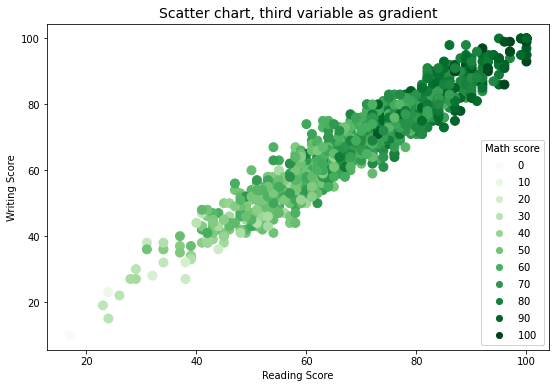

In [5]:
x = data_students['reading score']
y = data_students['writing score']
z = data_students['math score']

fig, ax = plt.subplots( figsize = (9,6))

scatter = ax.scatter(x, y, c = z , cmap = 'Greens' , s = 80)
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Math score")
ax.add_artist(legend)
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')
ax.set_title('Scatter chart, third variable as gradient', size = 14)
plt.show()


### Scatter Chart, Third Variable as Different marker sizes

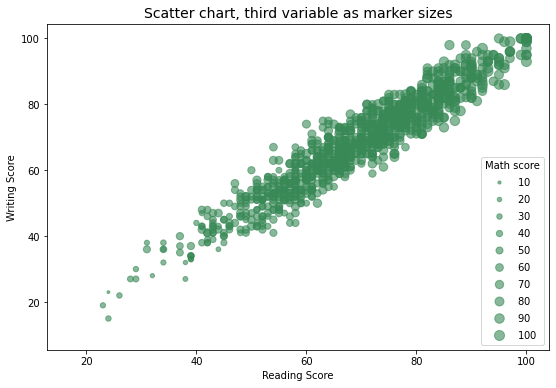

In [6]:
fig, ax = plt.subplots( figsize = (9,6) )

scatter = ax.scatter(x, y, c = '#388956', s = z,  alpha=0.6)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6 , color = '#388956')
legend = ax.legend(handles, labels, loc="lower right", title="Math score" )
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')
ax.set_title('Scatter chart, third variable as marker sizes', size = 14)
plt.show()


## Data Prepration for Line Charts

In [7]:
data_l = pd.read_csv('E:/Experiment/Deneb Experiment/IMDB top 100 Movies/movies.csv')

In [8]:
data_l.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [9]:
data_l.dtypes

index              float64
movie_name          object
year_of_release     object
category            object
run_time            object
genre               object
imdb_rating        float64
votes               object
gross_total         object
dtype: object

In [10]:
data_l['year_of_release'] = data_l['year_of_release'].str.replace(r'\D','')
data_l['year_of_release'] = data_l['year_of_release'].astype(int)

data_l['votes'] = data_l['votes'].str.replace(r'\D','')
data_l['votes'] = data_l['votes'].astype(int)

data_l['run_time'] = data_l['run_time'].str.replace(r'\D', '')
data_l['run_time'] = data_l['run_time'].astype(int)

data_l['gross_total'] = data_l['gross_total'].str.replace(r'\D','')
data_l['gross_total'] = data_l['gross_total'].astype(float)

data_l['index'] = data_l['index'].astype(int)

data_l.rename(columns={"index":"rank" , 'run_time' : 'run_time_(min)' , "gross_total": "gross_total_(M$)"}, inplace=True)

df_l = data_l.loc[:, [ 'rank' ,'year_of_release', 'run_time_(min)', 'gross_total_(M$)', 'votes' , 'imdb_rating' ]]

df_l.dtypes

<ipython-input-10-417c3d933fe3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_l['year_of_release'] = data_l['year_of_release'].str.replace(r'\D','')
<ipython-input-10-417c3d933fe3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data_l['votes'] = data_l['votes'].str.replace(r'\D','')
<ipython-input-10-417c3d933fe3>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data_l['run_time'] = data_l['run_time'].str.replace(r'\D', '')
<ipython-input-10-417c3d933fe3>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data_l['gross_total'] = data_l['gross_total'].str.replace(r'\D','')


rank                  int32
year_of_release       int32
run_time_(min)        int32
gross_total_(M$)    float64
votes                 int32
imdb_rating         float64
dtype: object

In [11]:
df_l.head()

,rank,year_of_release,run_time_(min),gross_total_(M$),votes,imdb_rating
0,1,1972,175,13497.0,1860471,9.2
1,2,1991,118,13074.0,1435344,8.6
2,3,1980,124,29048.0,1294805,8.7
3,4,1994,142,2834.0,2683302,9.3
4,5,1980,146,4402.0,1025560,8.4


In [12]:
handy = df_l.loc[:,['year_of_release', 'gross_total_(M$)' , 'imdb_rating']]

d = {'gross_total_(M$)':'Sum of Gross Revenue (M$)', 'imdb_rating':'Average imdb rating'}

data_imdb = handy.groupby('year_of_release').agg({'gross_total_(M$)':'sum', 'imdb_rating':'mean'}).rename(columns=d)

data_imdb.head()

,Sum of Gross Revenue (M$),Average imdb rating
year_of_release,,
1931,2.0,8.5
1936,16.0,8.5
1939,19868.0,8.2
1941,159.0,8.3
1942,102.0,8.5


### Line Chart, Third Variable as Gradient

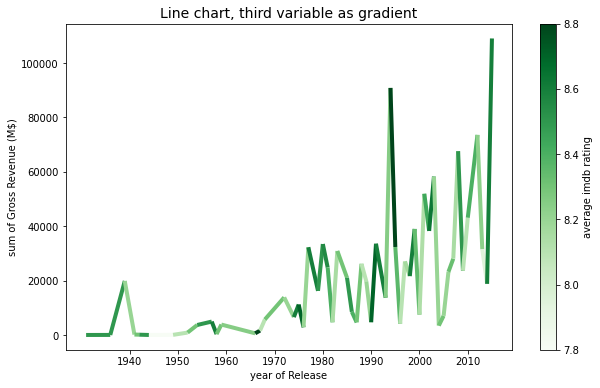

In [13]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = data_imdb.index
y = data_imdb['Sum of Gross Revenue (M$)']
z = data_imdb['Average imdb rating']


points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig, ax = plt.subplots( figsize = ( 10 , 6))

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(z.min(), z.max())
lc = LineCollection(segments, cmap='Greens', norm=norm)
lc.set_array(z)
lc.set_linewidth(4)
ax.add_collection(lc)

ax.autoscale()
fig.colorbar( lc, ax= ax, label='average imdb rating' )

ax.set_xticks([1940,1950,1960, 1970,1980, 1990, 2000, 2010])
ax.set_xlabel('year of Release')
ax.set_ylabel('sum of Gross Revenue (M$)')
ax.set_title('Line chart, third variable as gradient', size = 14)

plt.sci(lc)

plt.show()


### Line Chart, Third Variable as Different LineWidths

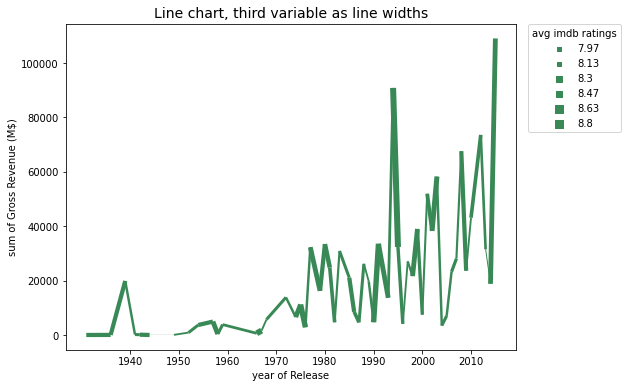

In [14]:
x = data_imdb.index
y = data_imdb['Sum of Gross Revenue (M$)']
z = data_imdb['Average imdb rating']



points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

#I used this formula for normalization of datapoints to 0.1 to 6
#https://stats.stackexchange.com/questions/286270/how-to-normalize-rating-in-scale-of-1-to-5
z = ((6 - 0.1) / (z.max() - z.min())) * (z - z.max()) + 6

fig, ax = plt.subplots( figsize = ( 10 , 6))

for (width, label) in zip([10, 20, 30, 40,  50, 60], [7.97, 8.13, 8.3, 8.47, 8.63, 8.8 ]):
    ax.scatter( [], [], marker = "s" ,c='#388956', s=width, 
               label= label  )
    
lc = LineCollection(segments, linewidths= z, color ='#388956' )
lc.set_array(z)
ax.add_collection(lc)
ax.autoscale()

ax.set_xticks([1940,1950,1960, 1970,1980, 1990, 2000, 2010])

    
fig.subplots_adjust(right=0.75)

ax.legend(
    scatterpoints=1,  title='avg imdb ratings',
    loc="upper left",
    bbox_to_anchor=(0.76, 0.89),
    bbox_transform=fig.transFigure 
       ) 
ax.set_xlabel('year of Release')
ax.set_ylabel('sum of Gross Revenue (M$)')
ax.set_title('Line chart, third variable as line widths', size = 14)

plt.show()


## HexBin Chart

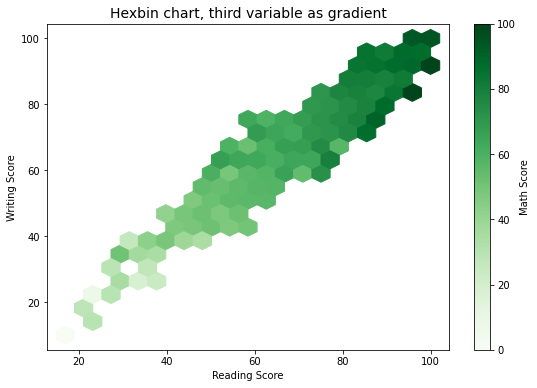

In [15]:
x = data_students['reading score']
y = data_students['writing score']
z = data_students['math score']

fig, ax = plt.subplots(figsize=(9, 6))

hexbin = ax.hexbin( x= x, y= y, C= z, gridsize = 20,
                         cmap = 'Greens' 
                  )
                       
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')

cb = fig.colorbar(hexbin, ax=ax, label='Math Score')

ax.set_title('Hexbin chart, third variable as gradient', size = 14)

plt.show()

## Contour Charts or HexBin, Third Variable as density or Number of records

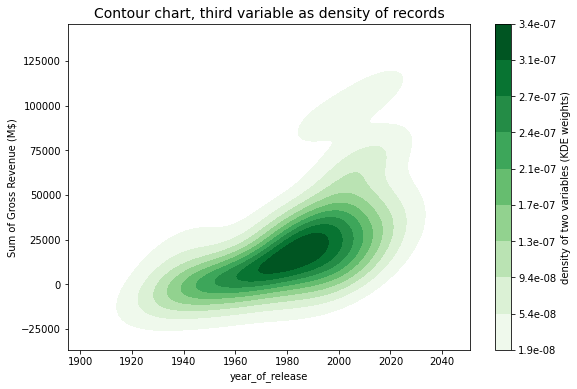

In [16]:
fig, ax = plt.subplots(figsize=(9, 6))

contour = sns.kdeplot(data= data_imdb, x= data_imdb.index , y='Sum of Gross Revenue (M$)',
                      cmap = "Greens" , fill = True,  cbar = True,
                      cbar_kws={'label': 'density of two variables (KDE weights)',  "format":"{x:.1e}" } ) 

ax.set_title('Contour chart, third variable as density of records', size = 14)

plt.show()

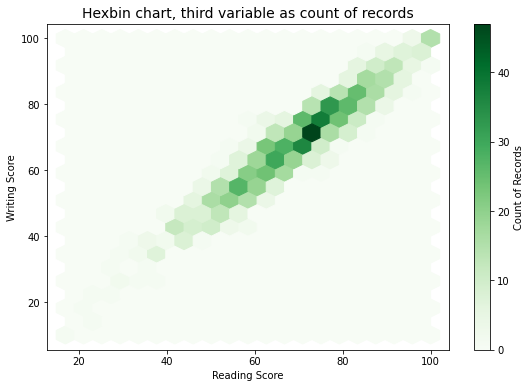

In [17]:
x = data_students['reading score']
y = data_students['writing score']
z = data_students['math score']

fig, ax = plt.subplots(figsize=(9, 6))

hexbin = ax.hexbin( x= x, y= y, gridsize = 20,
                         cmap = 'Greens' 
                  )
                       
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')

cb = fig.colorbar(hexbin, ax=ax, label='Count of Records')

ax.set_title('Hexbin chart, third variable as count of records', size = 14)

plt.show()

## MultiCoored Bar Chart

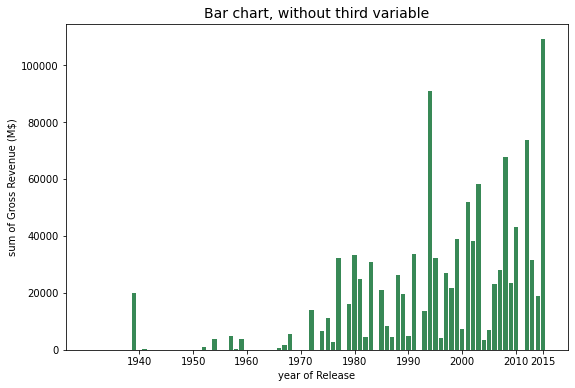

In [18]:
x = data_imdb.index
y = data_imdb['Sum of Gross Revenue (M$)']
z = data_imdb['Average imdb rating']

fig, ax = plt.subplots(figsize=(9, 6))

ax.bar( data_imdb.index, data_imdb['Sum of Gross Revenue (M$)'] , color ='#388956' )
ax.set_xlabel('year of Release')
ax.set_ylabel('sum of Gross Revenue (M$)')

ax.set_title('Bar chart, without third variable', size = 14)
ax.set_xticks([1940,1950,1960, 1970,1980, 1990, 2000, 2010, 2015])  

plt.show()

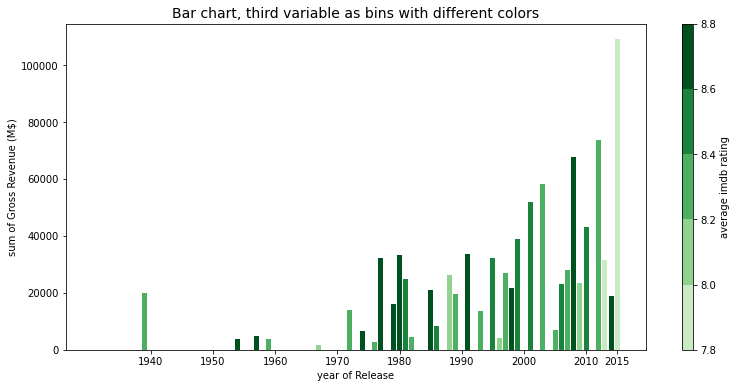

In [19]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

cmap = plt.cm.get_cmap('Greens')
rgba=[]
for i in np.arange(0.24,1,0.18):
    rgba.append( cmap(i) )
    
rgb = ['#d8f9c6', '#b1f28e', '#8aec55', '#63e51c', '#4aae14', '#32760d']
#You can get colors from a colormap or you can create a list of desired colors, both ways are the same
#But Here at the end I used the rgba, colors from color map

fig, ax = plt.subplots(figsize=(13, 6))

for i,c in zip(np.arange(7.8, 8.8, 0.1667), rgba):
    data =  data_imdb[(data_imdb['Average imdb rating'] < i + 0.15) & (data_imdb['Average imdb rating'] >= i) ]
    ax.bar( data.index, data['Sum of Gross Revenue (M$)'] , color = c)

ax.set_xticks([1940,1950,1960, 1970,1980, 1990, 2000, 2010, 2015])  

cmap = (ListedColormap(rgba))
fig.colorbar(cm.ScalarMappable(norm=norm, cmap= cmap), ax=ax, label='average imdb rating', aspect=30)

ax.set_xlabel('year of Release')
ax.set_ylabel('sum of Gross Revenue (M$)')
ax.set_title('Bar chart, third variable as bins with different colors', size = 14)

plt.show()  

## HeatMap

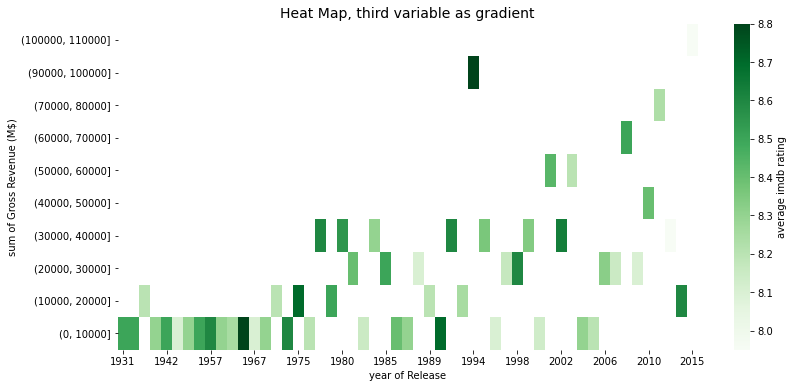

In [20]:
bins = [i for i in range(0, 120000, 10000)]
data_imdb = data_imdb.reset_index()
data_imdb_heatmap = data_imdb.groupby([ pd.cut(data_imdb['Sum of Gross Revenue (M$)'],bins=bins)
                                       ,'year_of_release']).agg({'Average imdb rating':'mean'})
data_imdb_heatmap.reset_index(inplace = True)
pivot_imdb = pd.pivot_table( data_imdb_heatmap, values= 'Average imdb rating', 
                             index=  'Sum of Gross Revenue (M$)', columns= 'year_of_release')


fig, ax = plt.subplots(figsize=(13, 6))

heatmap = sns.heatmap(pivot_imdb , 
                      cmap = "Greens",
                      xticklabels= 4,
                      cbar_kws={'label': 'average imdb rating'}) 

ax.set_xlabel('year of Release')
ax.set_ylabel('sum of Gross Revenue (M$)')
ax.set_title('Heat Map, third variable as gradient', size = 14)
ax.invert_yaxis()

plt.show()

# Thanks for reading

This is a notebook for this medium article:

If you want a clear explanation of this topic, please check out the article, thank you very much for your time and attention.